## 1.系統環境配置與載入相關模組
```
下面這個儲存格只執行一次就好
```





In [7]:
import os
import tensorflow as tf
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['axes.grid'] = False
import numpy as np
import PIL.Image
import time
import functools

##  2.定義有用的函數

In [8]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [9]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [10]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

## 3.設定
```
**每次更改圖片請同時更改名稱以及url
否則會因為名稱已經存在而不下載**

cpathname:使用的照片名稱
cpathurl:使用的照片url

spathname:風格照片名稱
spathurl:風格照片url
```
```
抓自己github的照片
須注意
```

In [11]:
# 設定你的照片
cpathname="myphoto4"#@param {type: "string"}
cpath="https://raw.githubusercontent.com/chenyu123123123/nsjh/main/IMG20201208141201.jpg"#@param {type: "string"}
#cpath="https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg"#@param {type: "string"}

# 設定要使用的藝術家風格
spathname="mystylephoto4"#@param {type: "string"}
spath="https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg"#@param {type: "string"}

# 設定
content_path = tf.keras.utils.get_file(cpathname, cpath)
style_path = tf.keras.utils.get_file(spathname,spath)
#範例圖片:  https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg
#範例圖片:  https://pic.pimg.tw/volvo2266/1483538279-633293117.jpg

196608/195196 [==============================] - 0s 0us/step


## 4.顯示原始照片與藝術風格

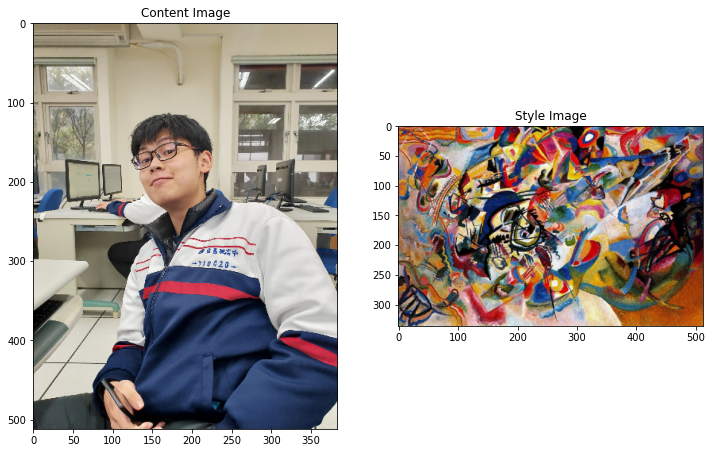

In [12]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

## 5.執行原始照片的藝術化並顯示最後成果

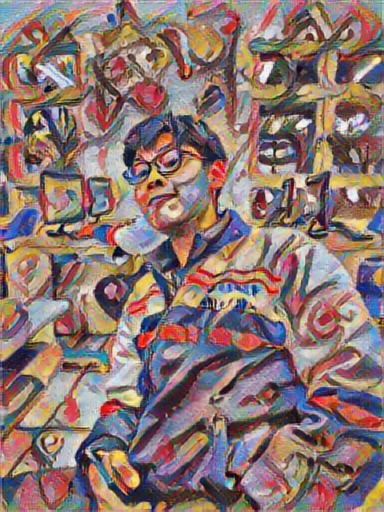

In [13]:
# 使用Tensorflow HUB 進行 Transfer Learning(遷移學習)
import tensorflow_hub as hub

hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

#顯示最後成果
tensor_to_image(stylized_image)